In [42]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

# Load the data
url = 'https://raw.githubusercontent.com/EunCheolChoi0123/COMM557Tutorial/refs/heads/main/Tutorial%2010%20Supervised%20Learning%20(2)/task.json'
post_df = pd.read_json(url)

post_df['date'] = pd.to_datetime(post_df['created_utc'], unit='s')
# post_df['created_utc'] = pd.to_datetime(post_df['created_utc'], unit='s').dt.date

date_column = ['date']
author_column = ['author_premium', 'over_18']
comment_column = ['n_comments', 'tree_depth', 'tree_width']
emotion_column = ['joy', 'anger', 'fear', 'sadness', 'disgust', 'surprise']
toxicity_column = ['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack']
regression_column = ['score', 'high_score', 'log_score']

df = post_df[date_column + author_column + comment_column + emotion_column + toxicity_column + regression_column]
df['author_premium'] = df['author_premium'].fillna(0)


# Columns to be log-transformed
cols_to_be_scaled = ['n_comments','tree_depth','tree_width']
df[cols_to_be_scaled] = df[cols_to_be_scaled].astype(float)

df.loc[:, cols_to_be_scaled] = np.log10(df[cols_to_be_scaled] + 1)


/tmp/ipython-input-1998016979.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['author_premium'] = df['author_premium'].fillna(0)
/tmp/ipython-input-1998016979.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_be_scaled] = df[cols_to_be_scaled].astype(float)


In [43]:
df

,date,author_premium,over_18,n_comments,tree_depth,tree_width,joy,anger,fear,sadness,...,surprise,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,score,high_score,log_score
0,2024-01-01 00:15:08,0.0,0,1.230449,0.845098,0.903090,0.009309,0.012789,0.007575,0.731158,...,0.006934,0.009208,0.000128,0.000599,0.000192,0.000523,0.000323,1,0,0.000000
1,2024-01-01 01:10:02,0.0,0,0.778151,0.477121,0.602060,0.002980,0.830623,0.023697,0.104113,...,0.014641,0.126472,0.001246,0.113598,0.000785,0.010245,0.001256,1,0,0.000000
2,2024-01-01 02:50:00,0.0,0,0.301030,0.301030,0.301030,0.003767,0.024455,0.005325,0.005774,...,0.005751,0.014552,0.000139,0.000821,0.000262,0.000627,0.000296,1,0,0.000000
3,2024-01-01 03:47:30,0.0,0,0.301030,0.301030,0.301030,0.306072,0.013140,0.001310,0.005696,...,0.039513,0.003418,0.000111,0.000402,0.000165,0.000290,0.000174,1,0,0.000000
4,2024-01-01 04:31:35,0.0,0,0.301030,0.301030,0.301030,0.004146,0.016826,0.105016,0.293395,...,0.026760,0.032538,0.000294,0.005105,0.000312,0.002128,0.000542,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-02-05 04:48:05,0.0,0,0.698970,0.477121,0.477121,0.101455,0.117351,0.002337,0.680126,...,0.020239,0.081909,0.000756,0.060651,0.000545,0.004562,0.000634,7,1,0.845098
996,2024-02-05 06:24:30,0.0,0,0.301030,0.301030,0.301030,0.014363,0.011943,0.018670,0.058084,...,0.004587,0.008215,0.000142,0.000869,0.000171,0.000465,0.000241,4,0,0.602060
997,2024-02-05 07:11:01,0.0,0,0.301030,0.301030,0.301030,0.036852,0.193638,0.175098,0.492623,...,0.013046,0.012416,0.000302,0.003963,0.000259,0.001093,0.000417,2,0,0.301030
998,2024-02-05 07:29:18,0.0,0,1.000000,0.602060,0.778151,0.002610,0.018917,0.003812,0.912156,...,0.009361,0.022165,0.000155,0.001820,0.000284,0.000864,0.000281,6,1,0.778151


# T-test
- for making a claim that 'two groups are significantly different in terms of the average of variable Y'
- assumes normal distribution
- for comparing variables not remotely normal, Mann–Whitney U is commonly used.

/tmp/ipython-input-232626518.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['joy_log'] = np.log(df['joy'])


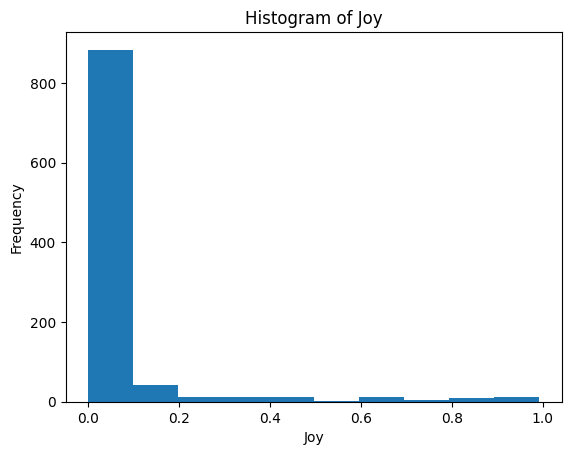

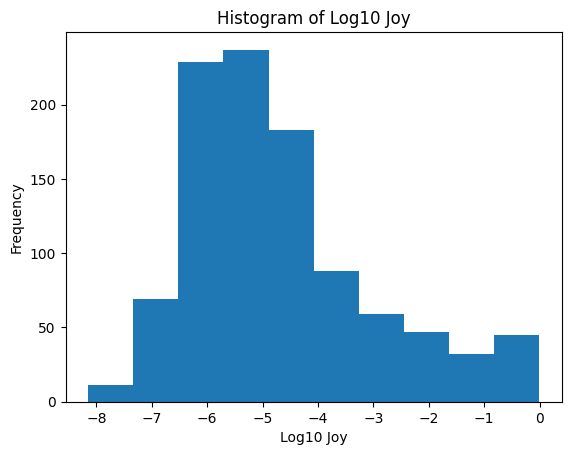

In [44]:
import matplotlib.pyplot as plt

import numpy as np

df['joy_log'] = np.log(df['joy'])

plt.hist(df['joy'].dropna())
plt.xlabel('Joy')
plt.ylabel('Frequency')
plt.title('Histogram of Joy')

plt.show()


plt.hist(df['joy_log'].dropna())
plt.xlabel('Log10 Joy')
plt.ylabel('Frequency')
plt.title('Histogram of Log10 Joy')

plt.show()


In [45]:
from scipy.stats import ttest_ind
import pandas as pd


cutoff = pd.to_datetime('2024-01-20')

group_A = df.loc[df['date'] > cutoff, 'joy_log'].dropna()
group_B = df.loc[df['date'] <= cutoff, 'joy_log'].dropna()

t_stat, p_value = ttest_ind(group_A, group_B, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -0.09551050844033296
p-value: 0.9239291496776408


/tmp/ipython-input-3196901762.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([group_A, group_B], labels=['After', 'Before/On'])


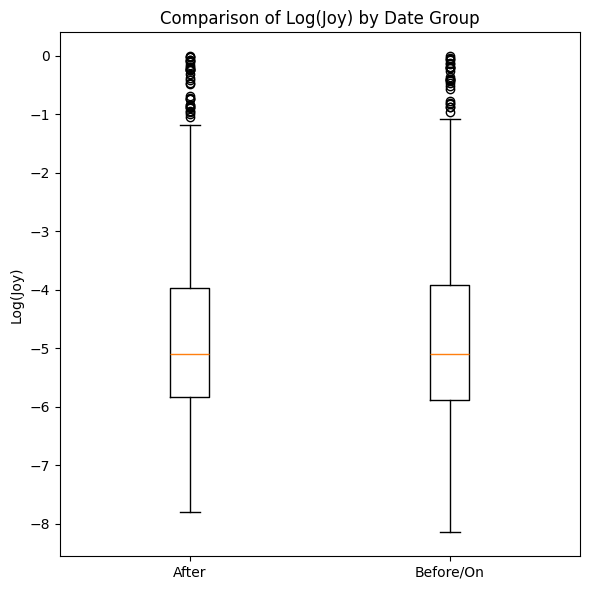

In [46]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.boxplot([group_A, group_B], labels=['After', 'Before/On'])
ax.set_title('Comparison of Log(Joy) by Date Group')
ax.set_ylabel('Log(Joy)')

plt.tight_layout()
plt.show()


In [47]:
# Mann-Whitney U
from scipy.stats import mannwhitneyu

group_A = df.loc[df['date'] > cutoff, 'joy'].dropna()
group_B = df.loc[df['date'] <= cutoff, 'joy'].dropna()

u, p = mannwhitneyu(group_A, group_B, alternative='two-sided')

print("U-statistic:", u)
print("p-value:", p)

U-statistic: 125049.5
p-value: 0.8783778235288944


# ANOVA
- ANalysis Of VAriance
- for making a claim that 'three groups or more show significant difference'
- Non-parametric equivalent is Kruskal-Wallis test

/tmp/ipython-input-2477189275.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipython-input-2477189275.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


Group sizes:
  Group A (before 2024-01-15): 328
  Group B (2024-01-15 to before 2024-01-30): 463
  Group C (on/after 2024-01-30): 209

One-way ANOVA on joy_log by date group
F-statistic: 0.1398
P-value:     0.8695


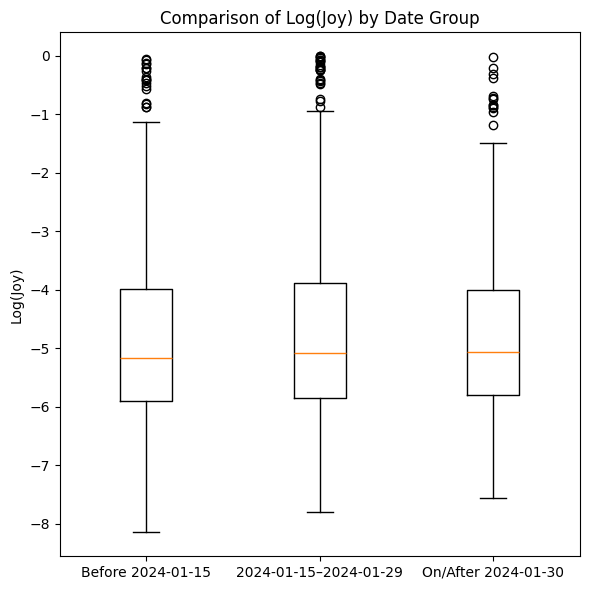

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway  # ANOVA

# Prepare groups

# Make sure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

cutoff_1 = pd.to_datetime('2024-01-15')
cutoff_2 = pd.to_datetime('2024-01-30')

group_A = df.loc[df['date'] < cutoff_1, 'joy_log'].dropna()
group_B = df.loc[(df['date'] >= cutoff_1) & (df['date'] < cutoff_2), 'joy_log'].dropna()
group_C = df.loc[df['date'] >= cutoff_2, 'joy_log'].dropna()

print("Group sizes:")
print(f"  Group A (before {cutoff_1.date()}): {len(group_A)}")
print(f"  Group B ({cutoff_1.date()} to before {cutoff_2.date()}): {len(group_B)}")
print(f"  Group C (on/after {cutoff_2.date()}): {len(group_C)}")

# (1) One-way ANOVA

f_stat, p_val = f_oneway(group_A, group_B, group_C)

print("\nOne-way ANOVA on joy_log by date group")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value:     {p_val:.4g}")

# (2) Boxplot in your requested style

fig, ax = plt.subplots(figsize=(6, 6))

ax.boxplot(
    [group_A, group_B, group_C],
    labels=[
        f"Before {cutoff_1.date()}",
        f"{cutoff_1.date()}–{(cutoff_2 - pd.Timedelta(days=1)).date()}",
        f"On/After {cutoff_2.date()}"
    ]
)

ax.set_title('Comparison of Log(Joy) by Date Group')
ax.set_ylabel('Log(Joy)')

plt.tight_layout()
plt.show()



Tukey HSD Results:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
 A_before_cut1 B_cut1_to_cut2   0.0597  0.876 -0.2262 0.3455  False
 A_before_cut1   C_after_cut2   0.0089 0.9981 -0.3417 0.3594  False
B_cut1_to_cut2   C_after_cut2  -0.0508 0.9305 -0.3809 0.2793  False
-------------------------------------------------------------------


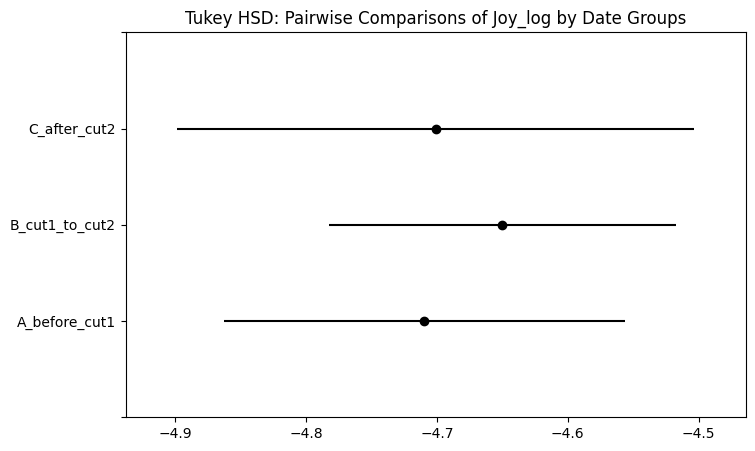

In [49]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create a long-form series of all values + group labels
joy_all = pd.concat([group_A, group_B, group_C], axis=0)
labels = (
    ["A_before_cut1"] * len(group_A)
    + ["B_cut1_to_cut2"] * len(group_B)
    + ["C_after_cut2"] * len(group_C)
)

# --- Tukey HSD post-hoc test ---

tukey = pairwise_tukeyhsd(endog=joy_all, groups=labels, alpha=0.05)
print("\nTukey HSD Results:")
print(tukey)

# --- Optional: plot Tukey summary ---

tukey.plot_simultaneous(figsize=(8, 5))
plt.title("Tukey HSD: Pairwise Comparisons of Joy_log by Date Groups")
plt.show()


In [32]:
!pip install scikit-posthocs

Group sizes:
  Group A (before 2024-01-15): 328
  Group B (2024-01-15 to before 2024-01-30): 463
  Group C (on/after 2024-01-30): 209

Kruskal–Wallis test on joy by date group
H-statistic: 0.4307
P-value:     0.8062


/tmp/ipython-input-1191445716.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipython-input-1191445716.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


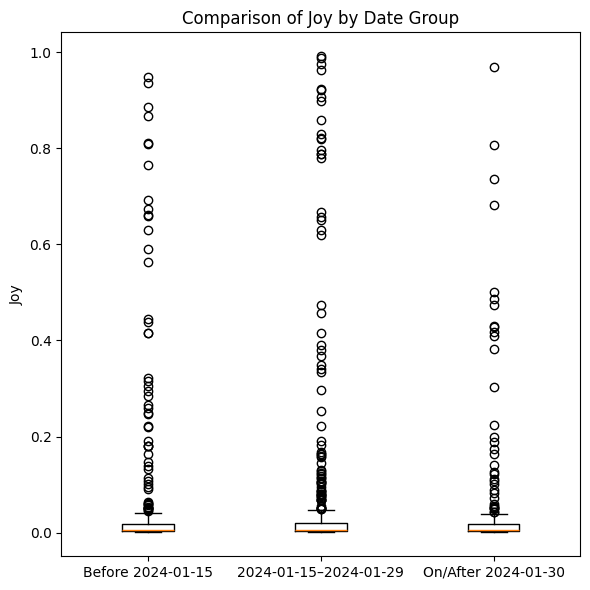


Dunn Post-hoc Test (Holm corrected p-values):
                A_before_cut1  B_cut1_to_cut2  C_after_cut2
A_before_cut1             1.0             1.0           1.0
B_cut1_to_cut2            1.0             1.0           1.0
C_after_cut2              1.0             1.0           1.0


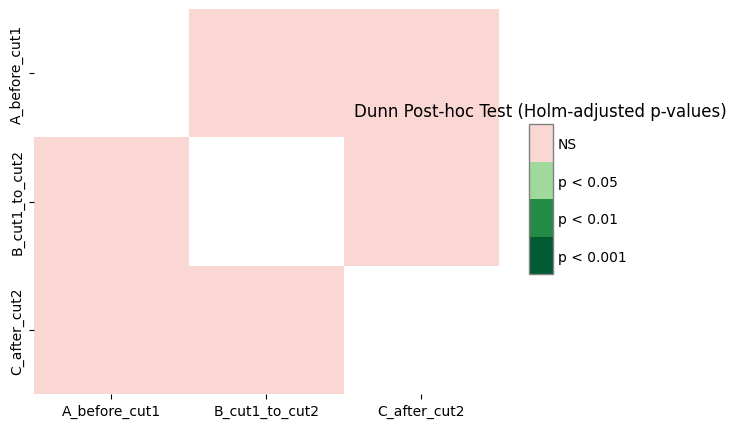

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kruskal  # Kruskal–Wallis (nonparametric)

# Prepare groups

df['date'] = pd.to_datetime(df['date'])

cutoff_1 = pd.to_datetime('2024-01-15')
cutoff_2 = pd.to_datetime('2024-01-30')

group_A = df.loc[df['date'] < cutoff_1, 'joy'].dropna()
group_B = df.loc[(df['date'] >= cutoff_1) & (df['date'] < cutoff_2), 'joy'].dropna()
group_C = df.loc[df['date'] >= cutoff_2, 'joy'].dropna()

print("Group sizes:")
print(f"  Group A (before {cutoff_1.date()}): {len(group_A)}")
print(f"  Group B ({cutoff_1.date()} to before {cutoff_2.date()}): {len(group_B)}")
print(f"  Group C (on/after {cutoff_2.date()}): {len(group_C)}")

# Kruskal–Wallis Test

h_stat, p_val = kruskal(group_A, group_B, group_C)

print("\nKruskal–Wallis test on joy by date group")
print(f"H-statistic: {h_stat:.4f}")
print(f"P-value:     {p_val:.4g}")

# Boxplot

fig, ax = plt.subplots(figsize=(6, 6))

ax.boxplot(
    [group_A, group_B, group_C],
    labels=[
        f"Before {cutoff_1.date()}",
        f"{cutoff_1.date()}–{(cutoff_2 - pd.Timedelta(days=1)).date()}",
        f"On/After {cutoff_2.date()}"
    ]
)

ax.set_title('Comparison of Joy by Date Group')
ax.set_ylabel('Joy')

plt.tight_layout()
plt.show()

# Dunn Post-hoc Test

import scikit_posthocs as sp

# Stack data + group labels for Dunn test
joy_all = pd.concat([group_A, group_B, group_C], axis=0)
labels = (
    ["A_before_cut1"] * len(group_A)
    + ["B_cut1_to_cut2"] * len(group_B)
    + ["C_after_cut2"] * len(group_C)
)

dunn = sp.posthoc_dunn([group_A, group_B, group_C], p_adjust='holm')
dunn.index = ["A_before_cut1", "B_cut1_to_cut2", "C_after_cut2"]
dunn.columns = ["A_before_cut1", "B_cut1_to_cut2", "C_after_cut2"]

print("\nDunn Post-hoc Test (Holm corrected p-values):")
print(dunn)

plt.figure(figsize=(6, 5))
sp.sign_plot(dunn)
plt.title("Dunn Post-hoc Test (Holm-adjusted p-values)")
plt.show()


# Correlation
- pearson for most of the times
- spearman for 'significance test of the non-normal dataset'

In [35]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df['joy_log'].dropna(), df['log_score'].dropna())
print(f"Pearson correlation between joy_log and log_score: {correlation:.4f}")
print(f"P-value: {p_value:.4g}")


Pearson correlation between joy_log and log_score: 0.0826
P-value: 0.008936


In [37]:
from scipy.stats import spearmanr

correlation_s, p_value_s = spearmanr(df['joy'].dropna(), df['anger'].dropna())
print(f"Spearman correlation between joy_log and log_score: {correlation_s:.4f}")
print(f"P-value: {p_value_s:.4g}")

Spearman correlation between joy_log and log_score: -0.1569
P-value: 6.122e-07


# Linear Regression
- how multiple variables are 'associated with' a 'numeric' variable

In [51]:
df.columns

Index(['date', 'author_premium', 'over_18', 'n_comments', 'tree_depth',
       'tree_width', 'joy', 'anger', 'fear', 'sadness', 'disgust', 'surprise',
       'toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult',
       'identity_attack', 'score', 'high_score', 'log_score', 'joy_log'],
      dtype='object')

In [54]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd


# Select variables

predictors = [
    'author_premium', 'over_18', 'n_comments', 'tree_depth', 'tree_width',
    'joy', 'anger', 'fear', 'sadness', 'disgust', 'surprise',
    'toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult',
    'identity_attack'
]

dv = 'score'

# Drop missing data only for used columns
df_model = df[predictors + [dv]].dropna()

X = df_model[predictors]
y = df_model[dv]

# Add intercept
X = sm.add_constant(X)

# Fit OLS model

model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())


vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     15.62
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           1.04e-40
Time:                        22:55:01   Log-Likelihood:                -4565.2
No. Observations:                1000   AIC:                             9166.
Df Residuals:                     982   BIC:                             9255.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -6.8036      2.219     

In [55]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd


# Select variables

predictors = [
    'author_premium', 'over_18', 'n_comments', # 'tree_depth', 'tree_width',
    'joy', 'anger', 'fear', 'sadness', 'disgust', 'surprise',
    'toxicity', # 'severe_toxicity', 'obscene', 'threat', 'insult',
    'identity_attack'
]

dv = 'score'

# Drop missing data only for used columns
df_model = df[predictors + [dv]].dropna()

X = df_model[predictors]
y = df_model[dv]

# Add intercept
X = sm.add_constant(X)

# Fit OLS model

model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())


vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     16.65
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           2.10e-30
Time:                        22:56:07   Log-Likelihood:                -4599.8
No. Observations:                1000   AIC:                             9224.
Df Residuals:                     988   BIC:                             9283.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -9.8306      2.095     

# Logistic Regression
- how multiple variables are 'associated with' a 'binary' variable

In [56]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# -----------------------------
# Select variables
# -----------------------------

predictors = [
    'author_premium', 'over_18', 'n_comments',
    'joy', 'anger', 'fear', 'sadness', 'disgust', 'surprise',
    'toxicity',
    'identity_attack'
]

dv = 'high_score'   # MUST be 0/1 for logistic regression

# Prepare data

df_model = df[predictors + [dv]].dropna()

X = df_model[predictors]
y = df_model[dv].astype(int)   # ensures 0/1

# Add intercept
X = sm.add_constant(X)

# Logistic Regression (Logit)

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

# VIF Calculation

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print("\nVariance Inflation Factors:")
print(vif_data)


Optimization terminated successfully.
         Current function value: 0.567752
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             high_score   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      988
Method:                           MLE   Df Model:                           11
Date:                Thu, 20 Nov 2025   Pseudo R-squ.:                  0.1801
Time:                        22:57:48   Log-Likelihood:                -567.75
converged:                       True   LL-Null:                       -692.43
Covariance Type:            nonrobust   LLR p-value:                 3.829e-47
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2531      0.221    -10.206      0.000      -2.686      -1.820
author_premium